This script generate 100 random experiments to compare nestedness with real personalized FR network.

In [1]:
# This script generate random experiments to compare nestedness
import sys
sys.path.append('../src')
from scipy import stats
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from nestedness_calculator import NestednessCalculator
import vis_function as vf
import warnings
import scipy.stats
import os
from copy import deepcopy as dc
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

def nestedness(fr_df, label):
    # find the distribution for personalized FR
    unique_fr = []
    for i in range(fr_df.shape[0]):
        for j in range(i+1, fr_df.shape[0]):
            if fr_df.iloc[i, j] > 0:
                unique_fr.append(fr_df.iloc[i,j])
    if len(unique_fr) > 2:
        p_value = scipy.stats.normaltest(unique_fr)[1]
        #print("p_value is {}, normal {}".format(p_value, p_value>0.05))
    xtitle = 'distribution of personalized FR ({})'.format(label)
    vf.fr_frequency(fr_df.values, xtitle)
    miu = np.mean(unique_fr)
    sigma = np.std(unique_fr)
    vf.heatmap_fr_continue(fr_df, 'personalized FR matrix ({})'.format(label))
    # binarized personalized FR and compute NODF
    binary_df = vf.heatmap_fr_binary(fr_df, 'binary matrix ({})'.format(label), 0.6)
    nested_nodf_score = NestednessCalculator(binary_df.values).nodf(binary_df.values)
    print("{} NODF = {}".format(label, nested_nodf_score))

    # NULL model 100 times
    a=stats.norm.rvs(miu,sigma,size=len(unique_fr))
    scores = []
    for i in range(100):
        pos_list=random.sample(list(range(0, int((fr_df.shape[0]**2-fr_df.shape[0])/2))), len(unique_fr))
        pos_list.sort()
        empty = np.zeros(shape = fr_df.shape)
        pos_idx = 0
        idx = 0
        for i in range(empty.shape[0]):
            if pos_idx == len(pos_list):
                break
            for j in range(i+1, empty.shape[0]):
                if pos_idx == len(pos_list):
                    break
                elif idx == pos_list[pos_idx]:
                    empty[i][j] = a[pos_idx]
                    pos_idx += 1
                idx += 1 
        empty += empty.T
        row, col = np.diag_indices_from(empty)
        empty[row, col] = 1
        empty_df = pd.DataFrame(empty)
        binary_empty = vf.cutoff_matrix(empty_df, 0.6)
        # binarized null model and compute NODF
        nodf_score = NestednessCalculator(binary_empty.values).nodf(binary_empty.values)
        scores.append(nodf_score)

    # visualize the last null model
    vf.heatmap_fr_continue(empty_df, 'null model ({})'.format(label))
    vf.heatmap_fr_binary(empty_df, 'null model binary ({})'.format(label), 0.6)
    print("{} last null model NODF = {}".format(label, nodf_score))
    t, p = scipy.stats.ttest_1samp(scores, nested_nodf_score)
    print("{} p value = {}".format(label, p))
    return scores, nested_nodf_score, p

In [2]:
# load data
input_dir = '../result/pheno_result'
fr_dict = {}
for disease in os.listdir(input_dir):
    fr_dict[disease] = {}
    disease_dir = os.path.join(input_dir, disease)
    for cohort in os.listdir(disease_dir):
        fr_dict[disease][cohort] = {}
        cdir = os.path.join(disease_dir, cohort, 'sp')
        for pheno in os.listdir(cdir):
            fr = pd.read_csv(os.path.join(cdir, pheno, 'layer_0', 'fr.tsv'), sep='\t', header=0, index_col=0)
            pheno = pheno.split('_')[-1]
            fr_dict[disease][cohort][pheno] = dc(fr)
            

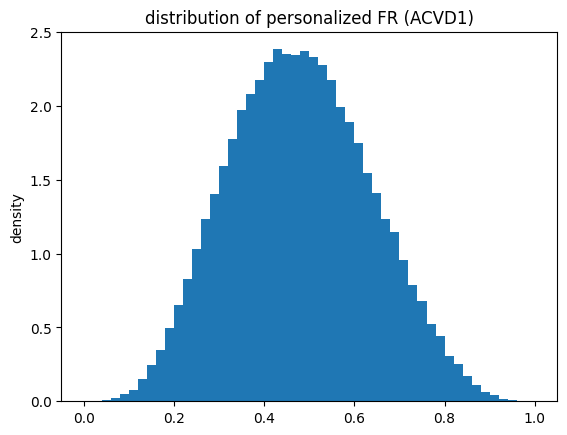

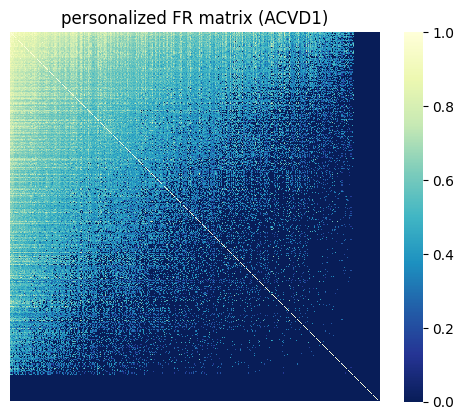

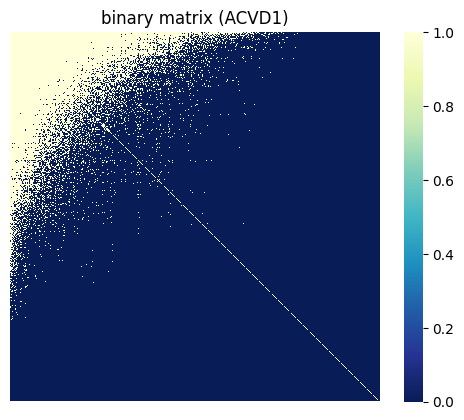

ACVD1 NODF = 0.4394791907327569


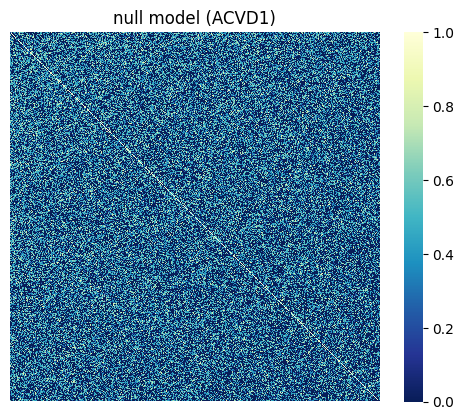

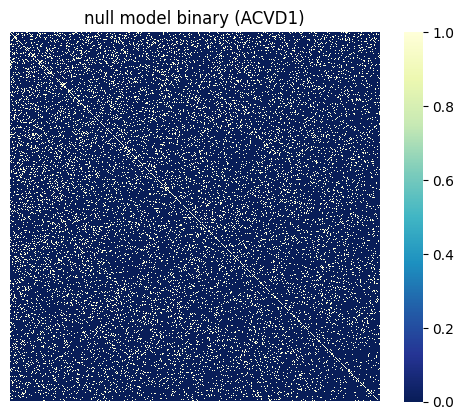

ACVD1 last null model NODF = 0.1136640295153087
ACVD1 p value = 4.405781523369839e-294


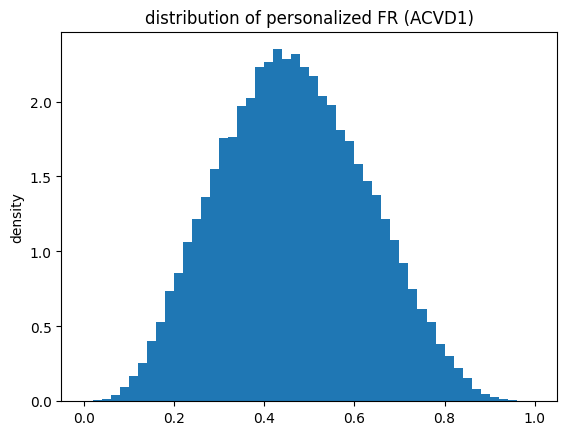

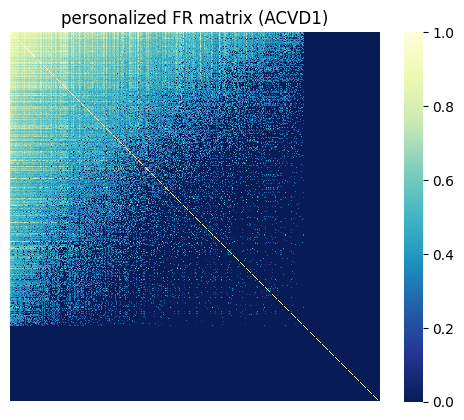

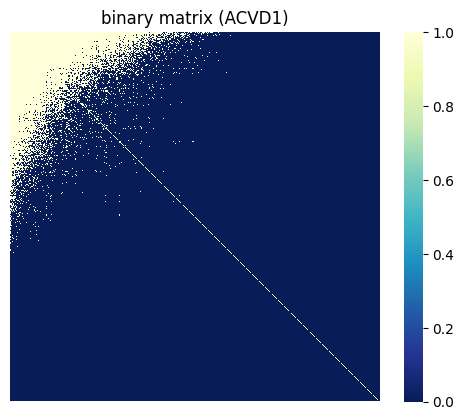

ACVD1 NODF = 0.25822184310127366


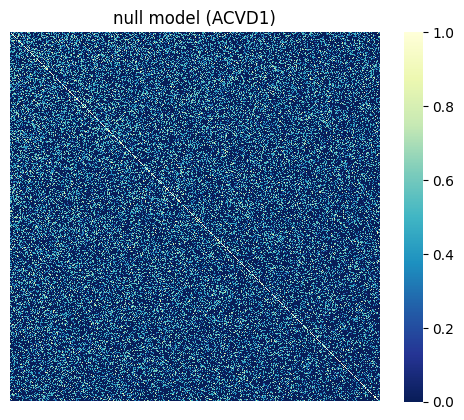

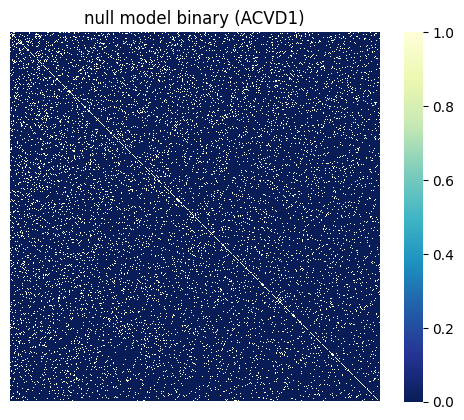

ACVD1 last null model NODF = 0.07282412479993136
ACVD1 p value = 1.4414482233647682e-280


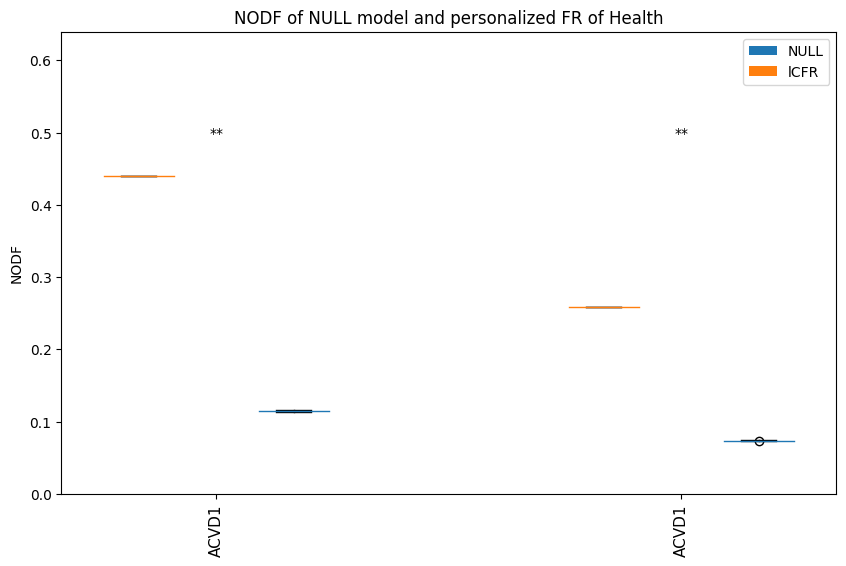

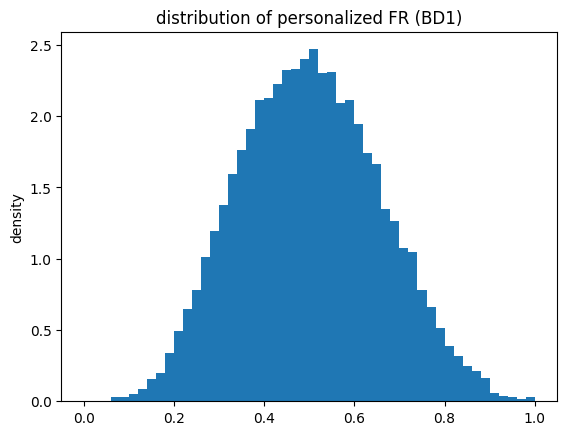

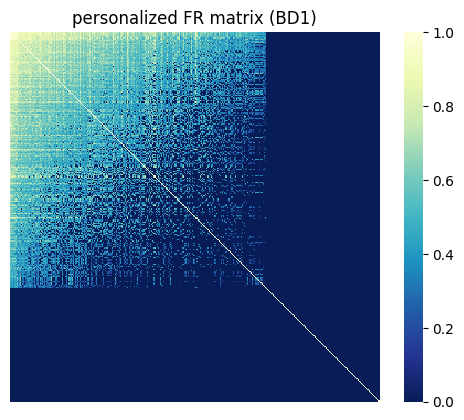

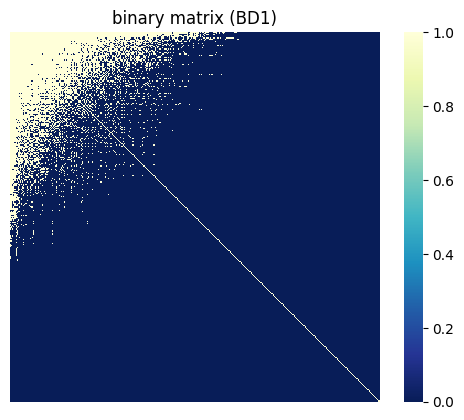

BD1 NODF = 0.2617550749910545


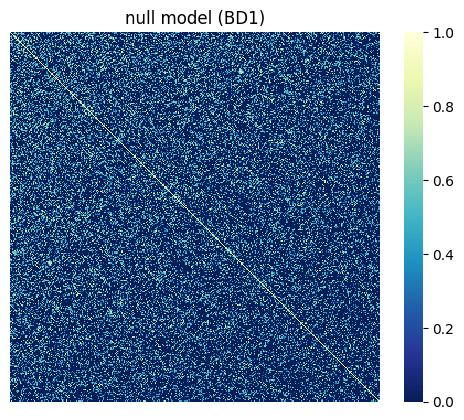

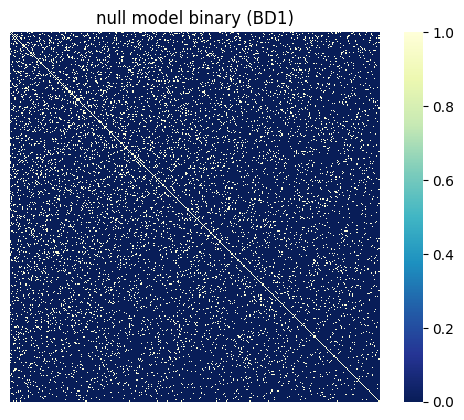

BD1 last null model NODF = 0.08550368744297655
BD1 p value = 7.688216672081046e-244


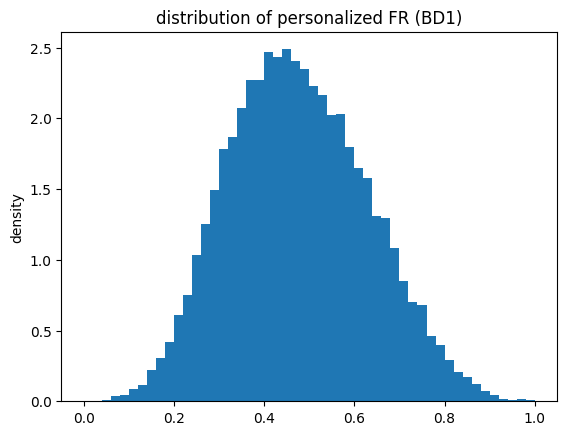

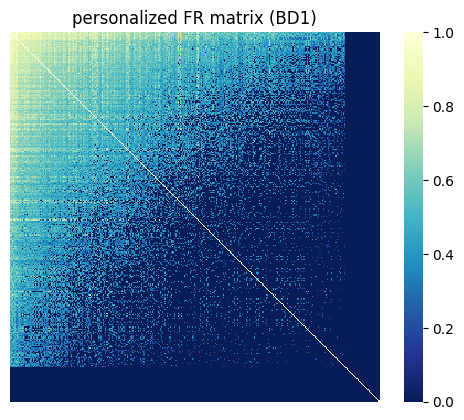

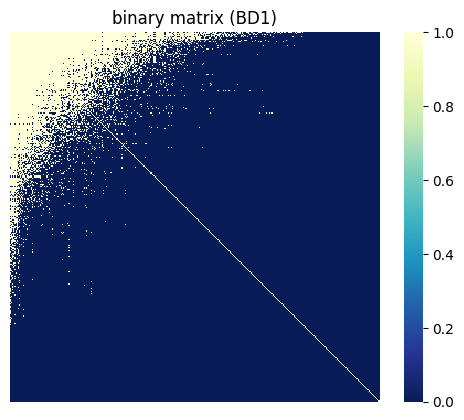

BD1 NODF = 0.4043770432652222


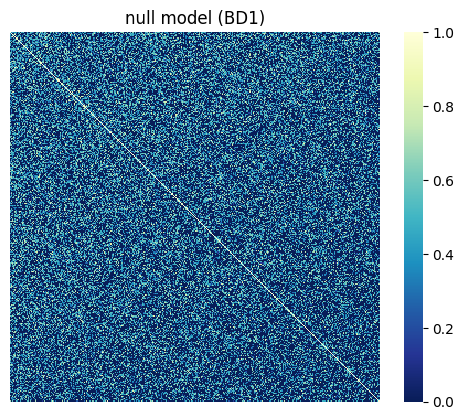

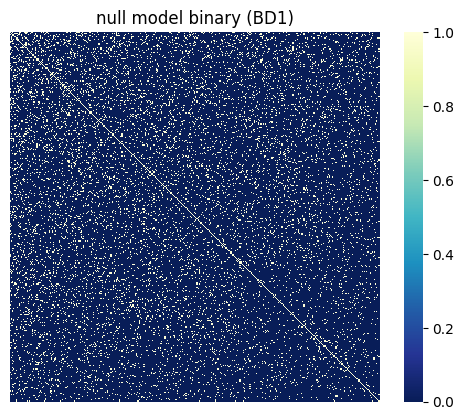

BD1 last null model NODF = 0.0977416105684945
BD1 p value = 3.076858667579962e-263


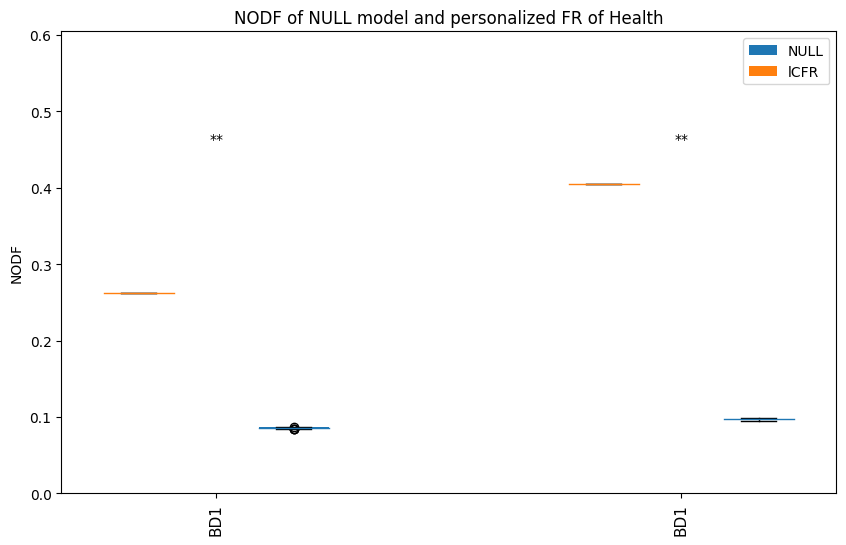

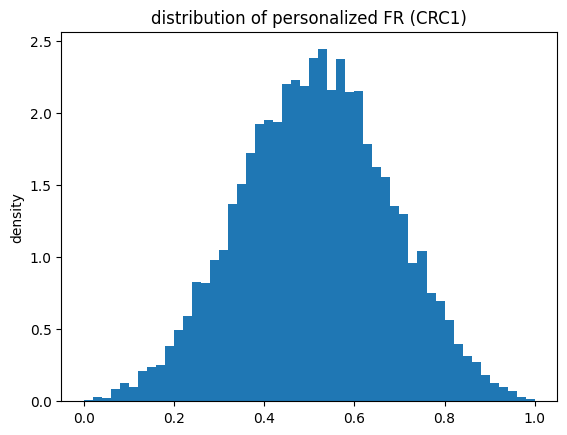

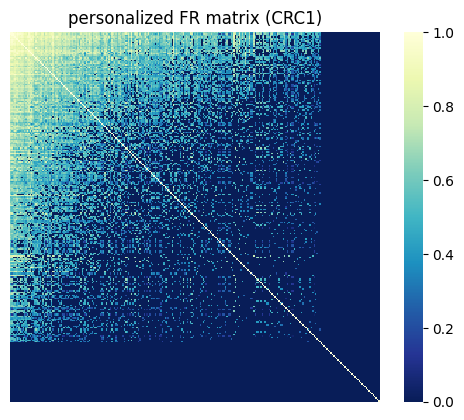

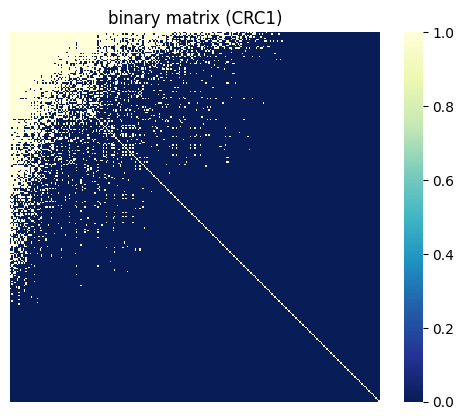

CRC1 NODF = 0.3274767078455598


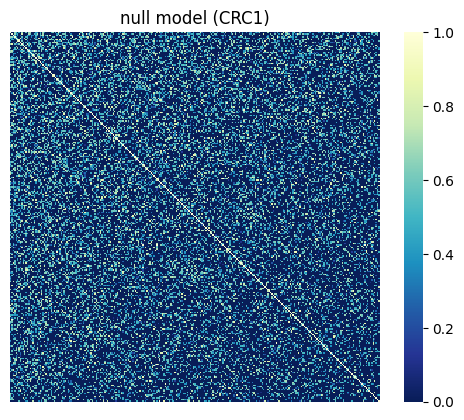

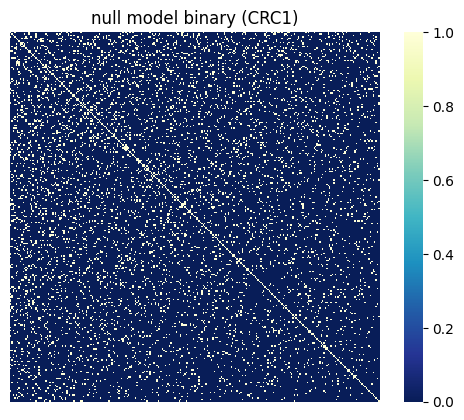

CRC1 last null model NODF = 0.10419240712525098
CRC1 p value = 3.139600573933792e-237


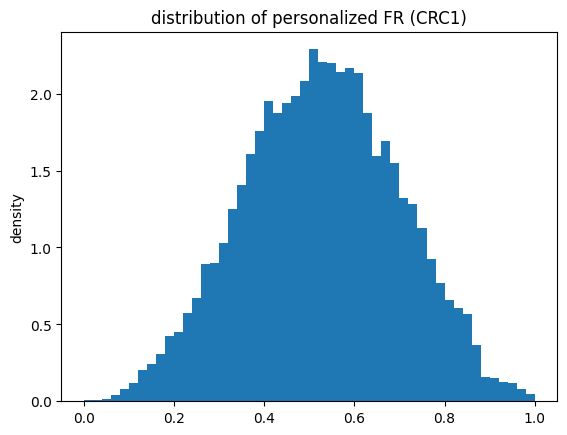

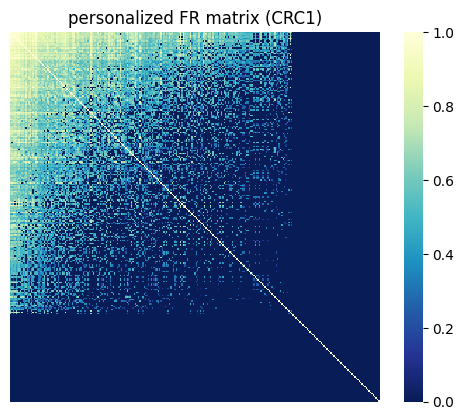

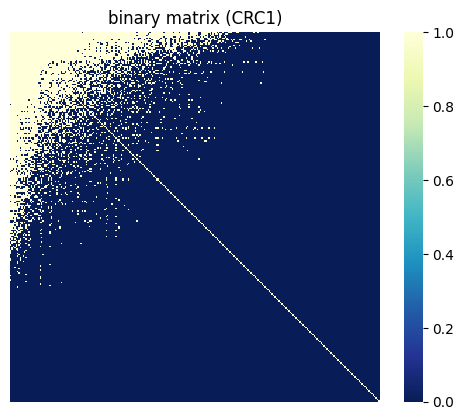

CRC1 NODF = 0.3086963597285741


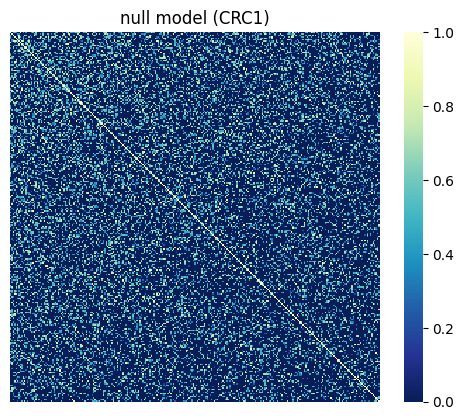

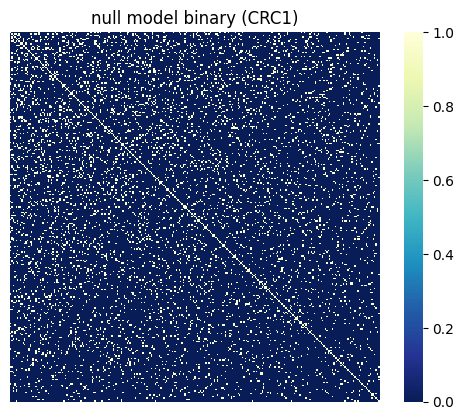

CRC1 last null model NODF = 0.10316751158445686
CRC1 p value = 1.2072900277588295e-233


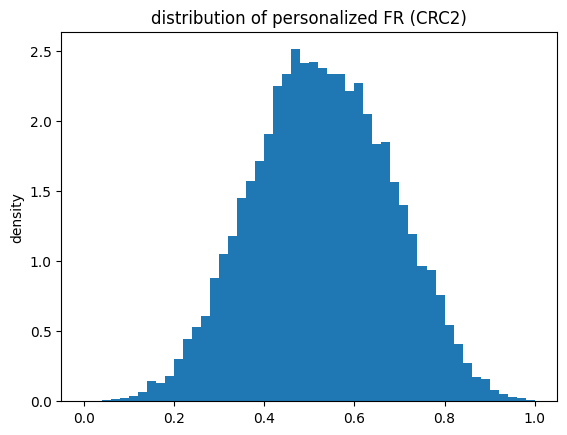

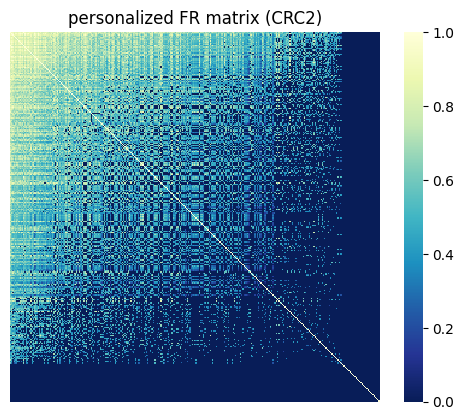

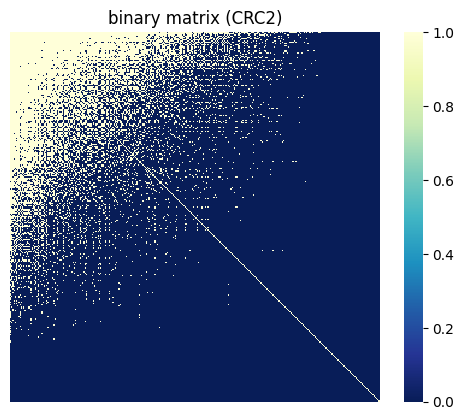

CRC2 NODF = 0.41799435534075063


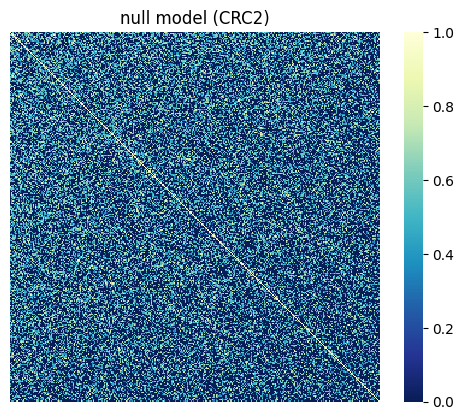

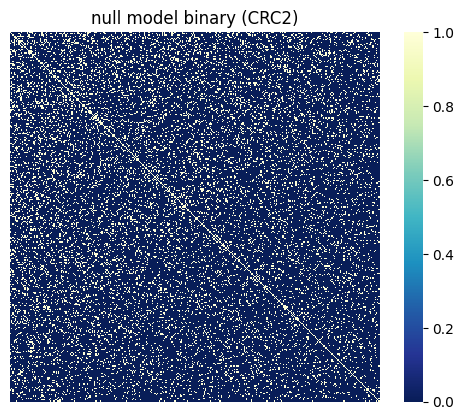

CRC2 last null model NODF = 0.15211314395183087
CRC2 p value = 1.0524213242679825e-245


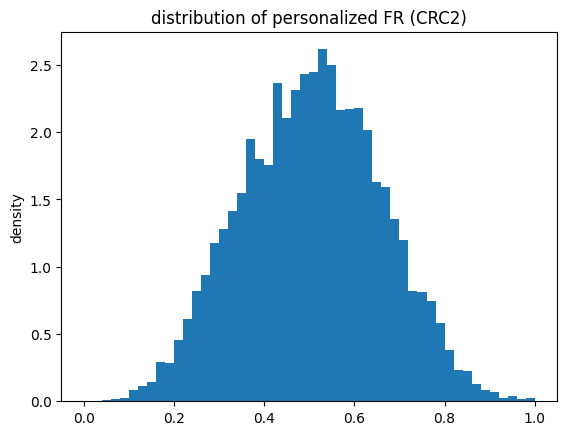

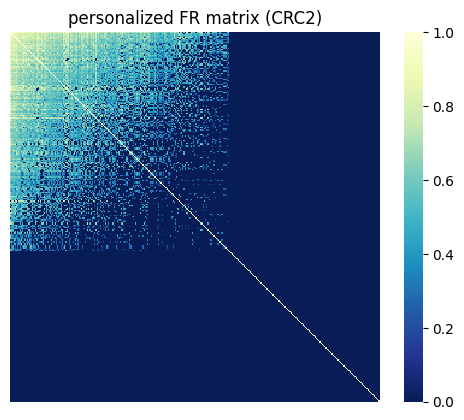

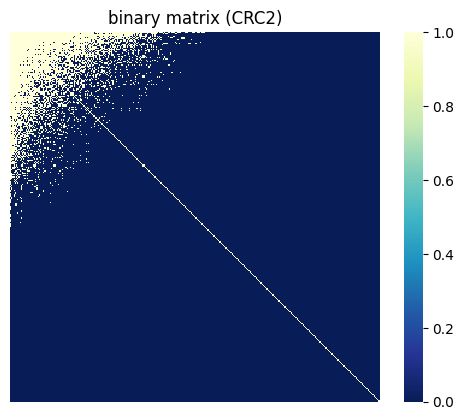

CRC2 NODF = 0.17200965619191577


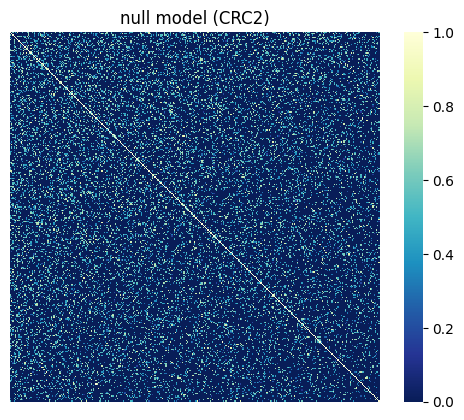

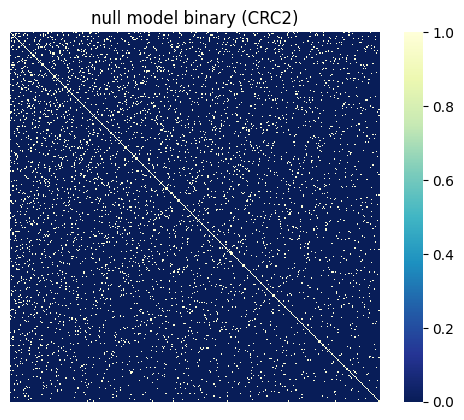

CRC2 last null model NODF = 0.05968187801411841
CRC2 p value = 8.148925003942206e-218


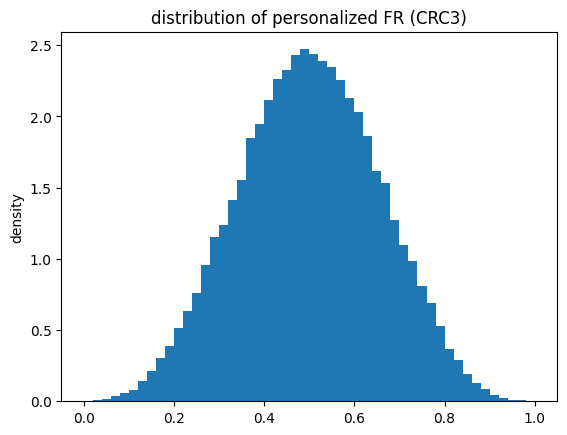

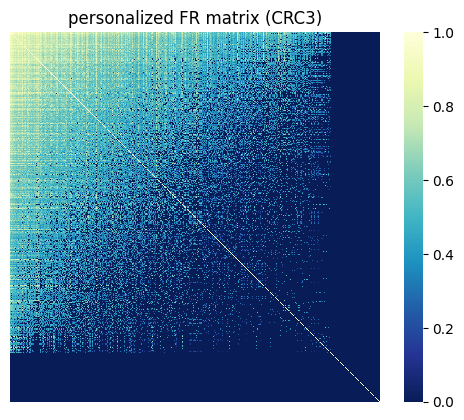

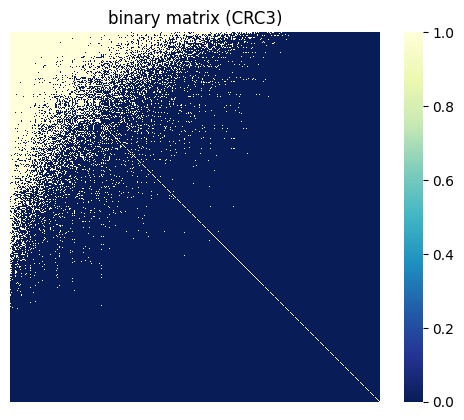

CRC3 NODF = 0.37627010528961424


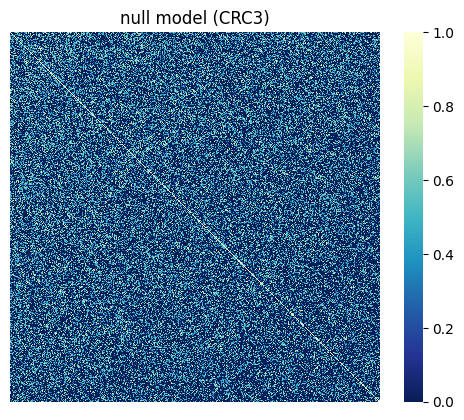

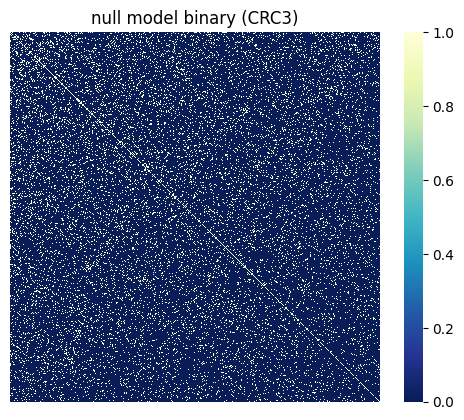

CRC3 last null model NODF = 0.11036375866057344
CRC3 p value = 2.2707946176796243e-277


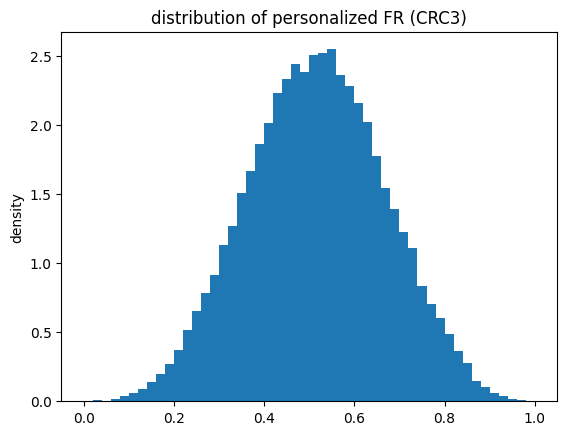

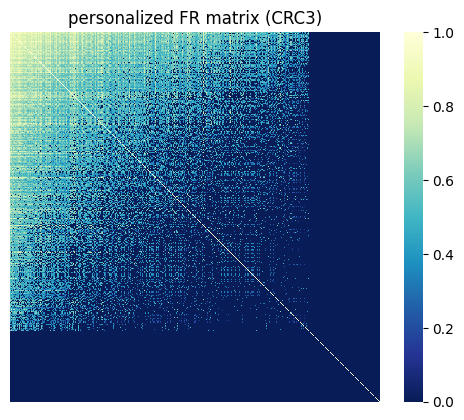

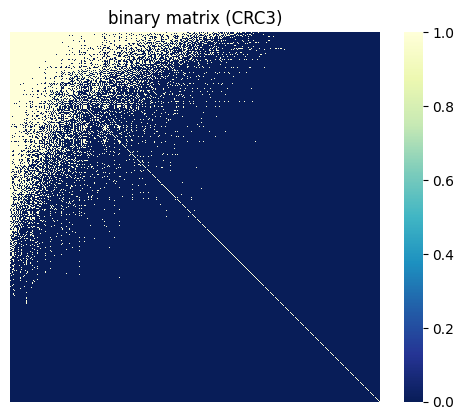

CRC3 NODF = 0.3548345234959814


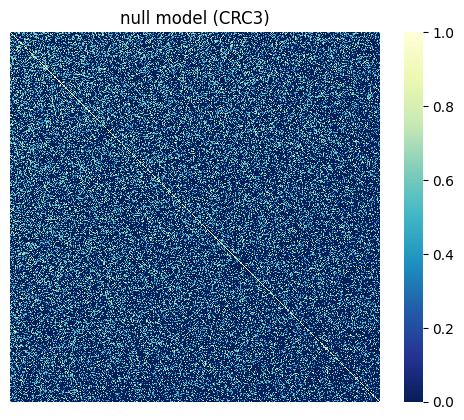

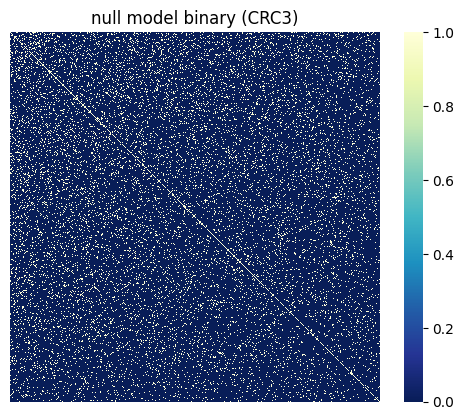

CRC3 last null model NODF = 0.10111968997014203
CRC3 p value = 1.4369126242355214e-276


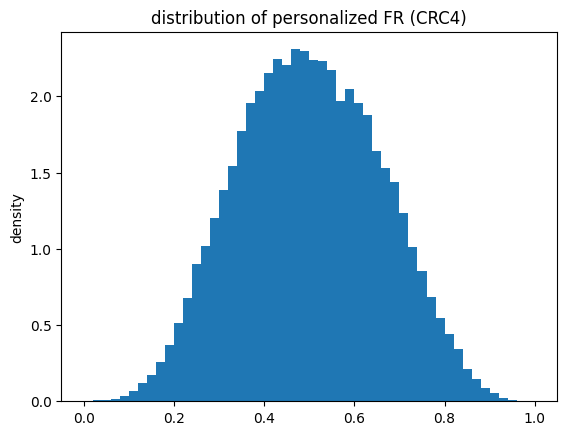

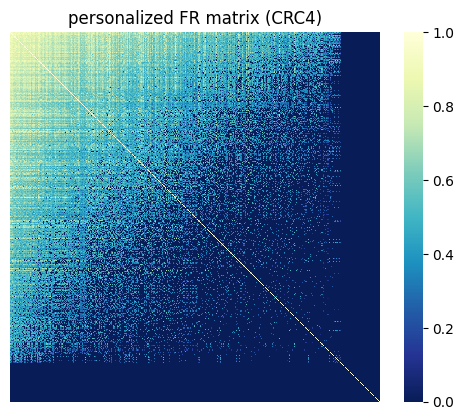

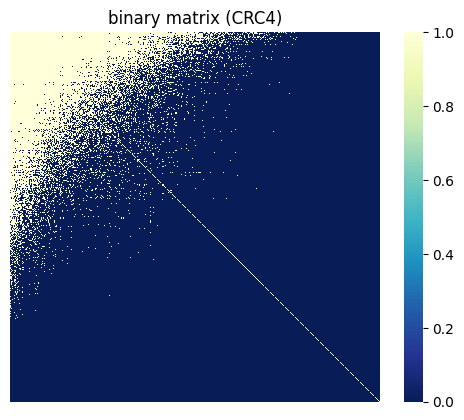

CRC4 NODF = 0.421583106986269


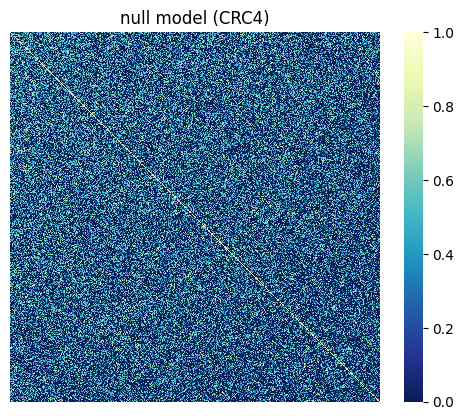

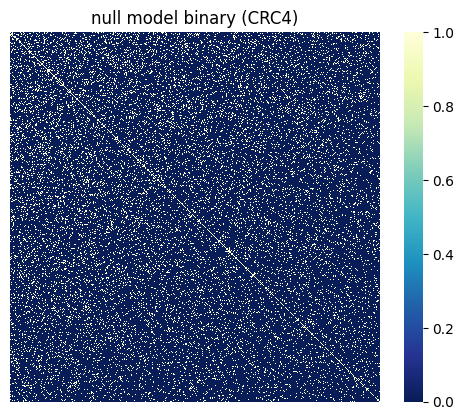

CRC4 last null model NODF = 0.12281764950796425
CRC4 p value = 5.3059700155245256e-278


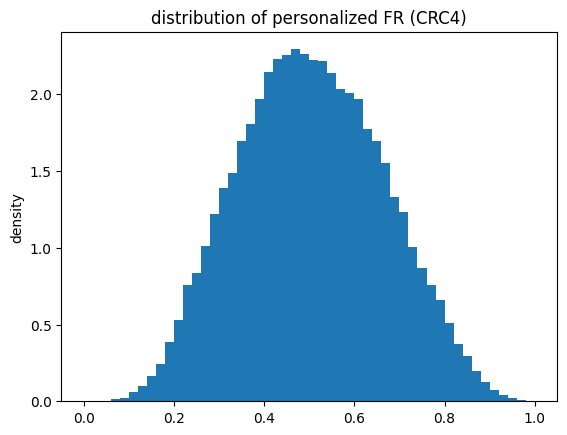

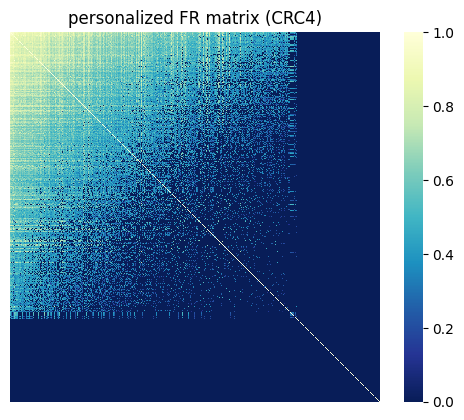

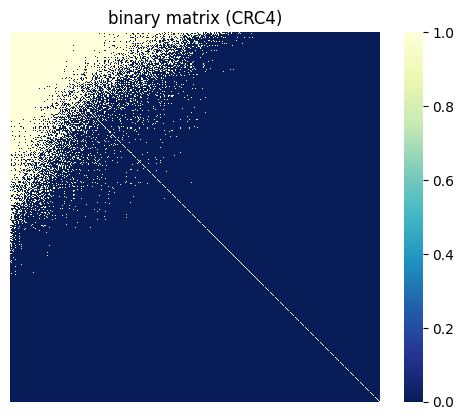

CRC4 NODF = 0.3095905069675584


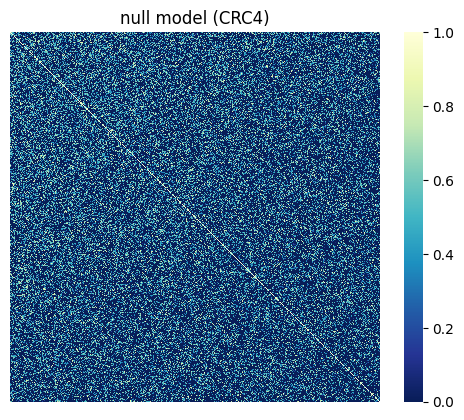

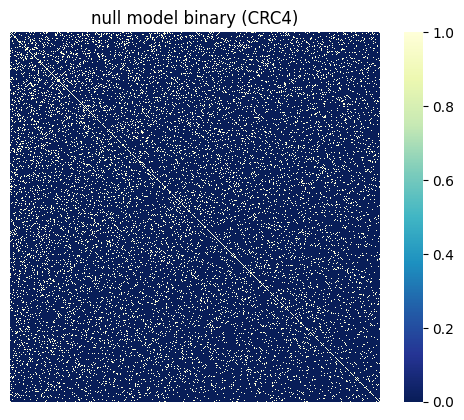

CRC4 last null model NODF = 0.10059931743943261
CRC4 p value = 1.1246732811599345e-264


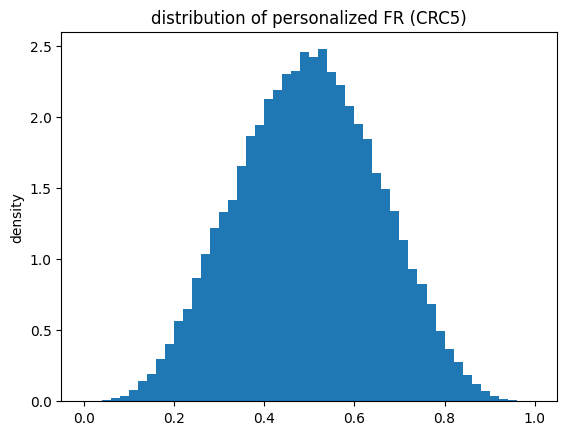

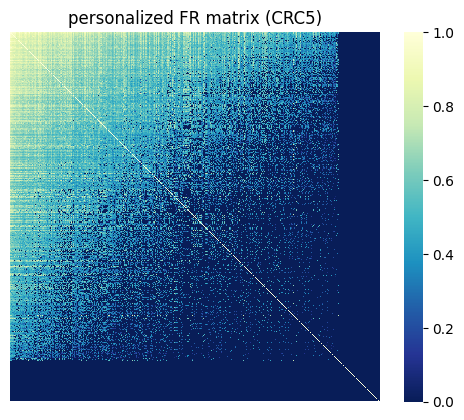

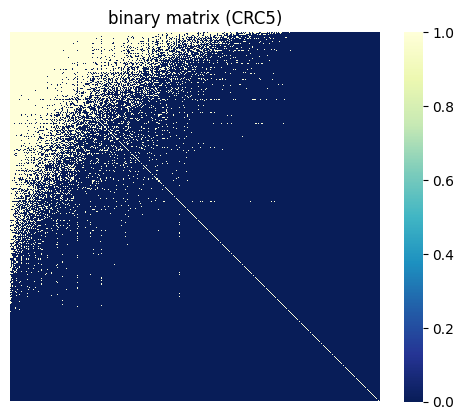

CRC5 NODF = 0.407950573482408


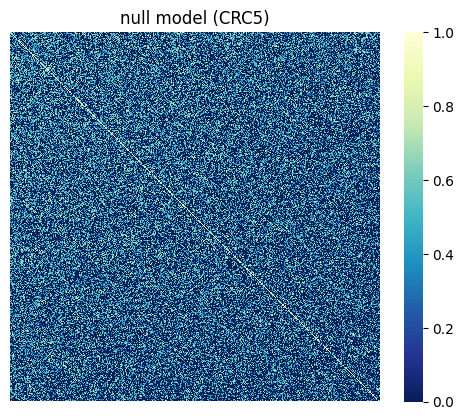

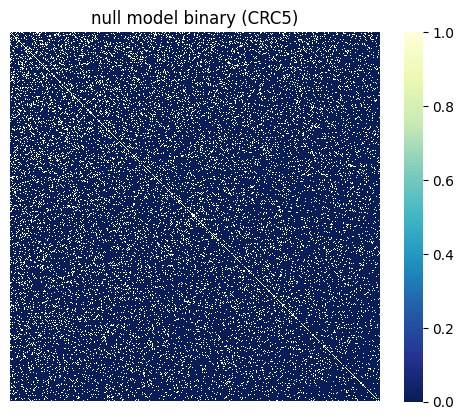

CRC5 last null model NODF = 0.11870002114414197
CRC5 p value = 9.721285356626183e-282


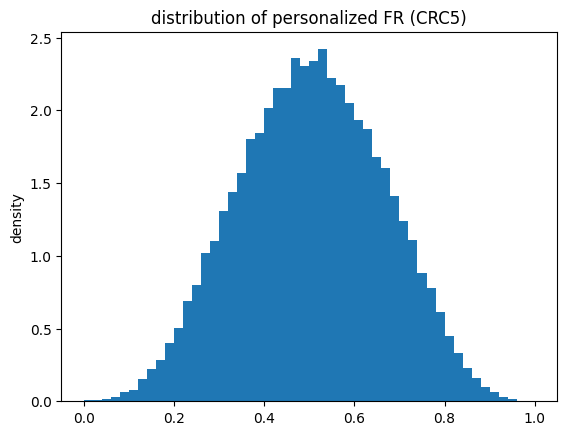

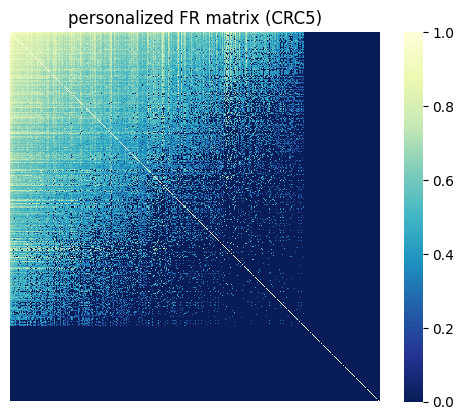

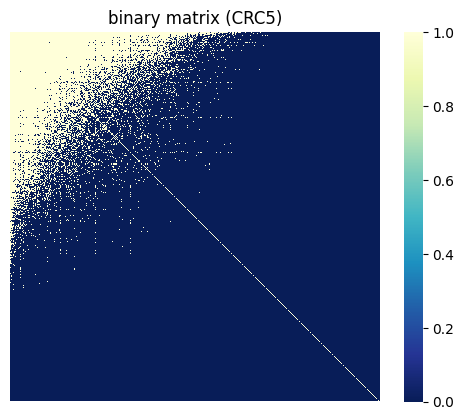

CRC5 NODF = 0.3493615636738465


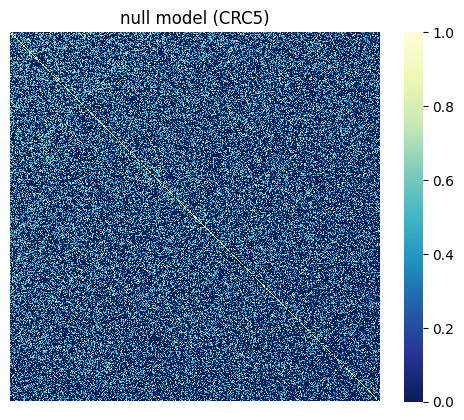

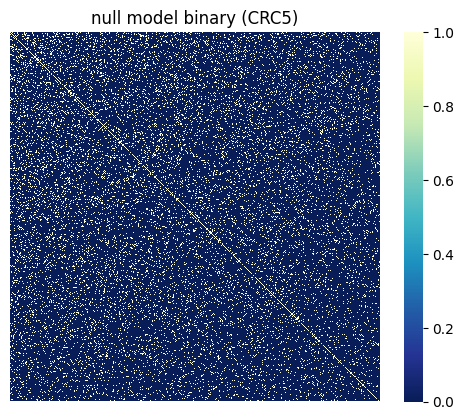

CRC5 last null model NODF = 0.11098600955277665
CRC5 p value = 1.0135239461362263e-266


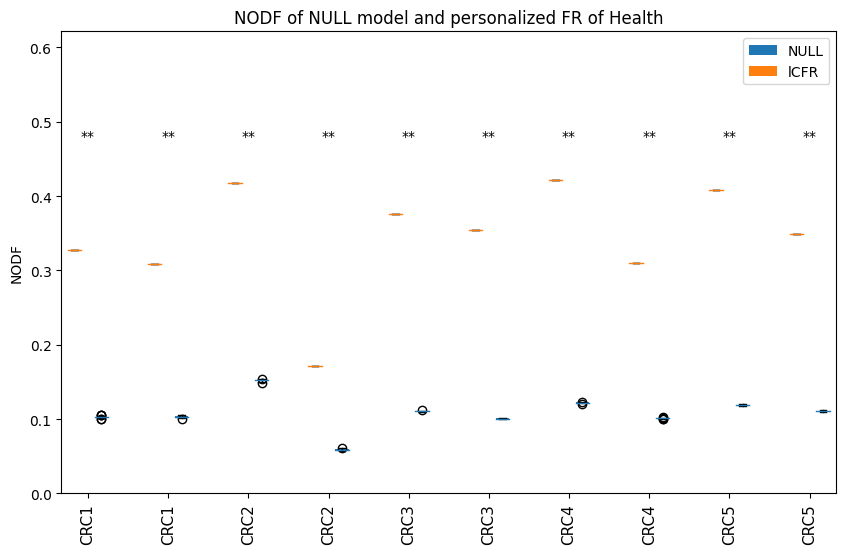

In [3]:

for disease in fr_dict.keys():
    empty_all = []
    nestedness_all = []
    p_list = []
    labels = []
    for cohort in fr_dict[disease].keys():
        for pheno in fr_dict[disease][cohort].keys():
            current_label = '{}'.format(cohort)
            scores, nested_nodf_score, p = nestedness(fr_dict[disease][cohort][pheno], current_label)
            empty_all.append(scores)
            nestedness_all.append(nested_nodf_score)
            p_list.append(p)
            labels.append(current_label)
    nested = [[x] for x in nestedness_all]
    x1 = list(range(1, len(p_list)*3, 3))
    x2 = [x+1 for x in x1]
    max_y = max(nestedness_all)
    plt.figure(figsize=(10, 6))
    box1 = plt.boxplot(empty_all,positions=x2, patch_artist=True, 
                boxprops={"facecolor": "C0",
                        "edgecolor": "C0",
                        "linewidth": 0},
                medianprops={"color": "C0", "linewidth": 1})
    box2 = plt.boxplot(nested,positions=x1, patch_artist=True, 
                boxprops={"facecolor": "C1",
                        "edgecolor": "C1",
                        "linewidth": 0},
                medianprops={"color": "C1", "linewidth": 1})
    lx = [(x1[i] + x2[i])/2 for i in range(len(x1))]
    plt.ylim([0, max(nestedness_all)+ 0.2])
    plt.xticks(lx,labels,fontsize=11, rotation=90)
    plt.ylabel('NODF')

    # add p value
    for i, x in enumerate(lx):
        p = p_list[i]
        if p < 0.01:
            mark = '**'
        elif p < 0.05:
            mark = '*'
        else:
            mark = ''
        plt.text(x, max_y + 0.05, mark, ha='center', va='bottom', fontsize=10)

    plt.legend(handles=[box1['boxes'][0],box2['boxes'][0]],labels=['NULL','lCFR'], loc=1)
    plt.title('NODF of NULL model and personalized FR of {}'.format(pheno))
    plt.show()
    